In [4]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/AAKASHRAVICHANDRAN/Prediction_of_Stock_Prices_using_Deep_Learning_Algorithms/main/data/stock_dataset.csv")


In [5]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [7]:
#Importing dataset
data = pd.read_csv("https://raw.githubusercontent.com/AAKASHRAVICHANDRAN/Prediction_of_Stock_Prices_using_Deep_Learning_Algorithms/main/data/stock_dataset.csv")
df = pd.DataFrame(data)

In [ ]:
df.head()

,date,symbol,open,close,low,high,volume
0,04-01-2017,AAPL,30.490000,30.572857,30.340000,30.642857,123432400
1,04-01-2017,AMZN,136.250000,133.899994,133.139999,136.610001,7599900
2,04-01-2017,GOOG,312.304948,312.205308,310.955001,313.580158,3927000
3,04-01-2017,NFLX,7.931428,7.640000,7.565714,7.961429,17239600
4,04-01-2017,YHOO,16.940001,17.100000,16.879999,17.200001,16587400


In [8]:
df.tail()

,date,symbol,open,close,low,high,volume
7545,31-12-2021,AAPL,107.010002,105.260002,104.820000,107.029999,40635300
7546,31-12-2021,AMZN,686.080017,675.890015,675.890015,687.750000,3718200
7547,31-12-2021,GOOG,769.500000,758.880005,758.340027,769.500000,1489600
7548,31-12-2021,NFLX,116.209999,114.379997,114.279999,117.459999,9245000
7549,31-12-2021,YHOO,33.220001,33.259998,33.180000,33.689999,7396000


In [9]:
#Data Information
df.describe()

,open,close,low,high,volume
count,7550.000000,7550.000000,7550.000000,7550.000000,7.550000e+03
mean,166.175709,166.146831,164.379266,167.813981,3.271390e+07
std,174.964208,174.892106,173.278414,176.414543,4.723713e+07
min,6.960000,7.018571,6.931428,7.178571,7.900000e+03
25%,33.640357,33.648215,33.110001,34.085001,4.581300e+06
50%,81.150002,81.007145,80.149998,81.796429,1.421810e+07
75%,276.659996,276.856968,273.485001,280.805400,3.666792e+07
max,776.599976,776.599976,766.900024,779.979980,4.702495e+08


In [10]:
#Showing column wise percentage of NaN values they contains
for i in df.columns:
  print(i,"\t\t-\t", df[i].isna().mean()*100)

date 		-	 0.0
symbol 		-	 0.0
open 		-	 0.0
close 		-	 0.0
low 		-	 0.0
high 		-	 0.0
volume 		-	 0.0


,corr value
open,0.999259
close,1.000000
low,0.999658
high,0.999663


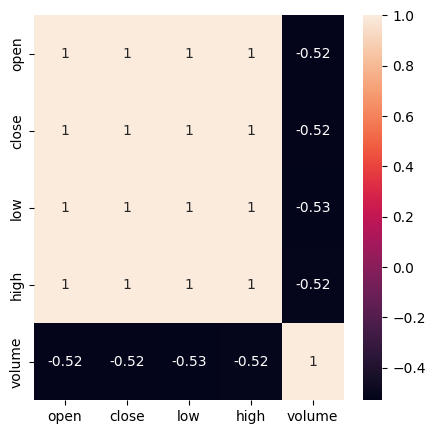

In [11]:
# Choosing stock values for any company
df = df[df['symbol'] == 'AAPL']

# Keep only numeric columns for correlation
df_numeric = df.select_dtypes(include=['number'])

# Correlation matrix
cormap = df_numeric.corr()

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot=True)

# Function to get highly correlated columns
def get_corelated_col(cor_dat, threshold):
    feature = []
    value = []

    for col in cor_dat.index:
        if abs(cor_dat[col]) > threshold:
            feature.append(col)
            value.append(cor_dat[col])

    return pd.DataFrame({'corr value': value}, index=feature)

# Example usage:
corr_close = cormap['close']   # correlation of each feature vs 'close'
get_corelated_col(corr_close, 0.6)


In [12]:
top_corelated_values = get_corelated_col(cormap['close'], 0.60)
top_corelated_values

df = df[top_corelated_values.index]
df.head()

,open,close,low,high
0,30.490000,30.572857,30.340000,30.642857
5,30.657143,30.625713,30.464285,30.798571
10,30.625713,30.138571,30.107143,30.747143
15,30.250000,30.082857,29.864286,30.285715
20,30.042856,30.282858,29.865715,30.285715


In [13]:
#Shaping the dataframe
df.shape

(1510, 4)

In [14]:
#Feature selection
X = df.drop(['close'], axis=1)
y = df['close']

#Scaling the values of dataset using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).head(1510)

,0,1,2
0,0.028123,0.030334,0.024806
1,0.029686,0.031526,0.026268
2,0.029392,0.028100,0.025785
3,0.025880,0.025769,0.021454
4,0.023943,0.025783,0.021454
...,...,...,...
1505,0.762008,0.774998,0.760278
1506,0.748828,0.758015,0.747982
1507,0.742939,0.764540,0.764314
1508,0.758082,0.767610,0.757462


In [15]:
#Prediction model

#Splitting data into training and testing pairs
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)
Acc = []

X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def reg():

    model = Sequential()

    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))

    model.add(Flatten())

    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

In [16]:
#1.Long short-term memory(LSTM) algorithm

X_train_ = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_ = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [17]:
#Layers of LSTM
from tensorflow.keras.layers import LSTM

def Reg():
    model = Sequential()

    model.add(LSTM(70, return_sequences=True, input_shape=(30,1)))
    model.add(LSTM(70, return_sequences=True))
    model.add(LSTM(70))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

In [18]:
#Model Training
model_1 = reg()
model_1.fit(X_train_, y_train, epochs=60, validation_split=0.2)

c:\Users\narea\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 3427.5098 - val_loss: 3469.0940
Epoch 2/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 354.8329 - val_loss: 87.0949
Epoch 3/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.1903 - val_loss: 1.4106
Epoch 4/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9032 - val_loss: 3.6612
Epoch 5/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9476 - val_loss: 0.9673
Epoch 6/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5779 - val_loss: 0.6900
Epoch 7/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4247 - val_loss: 0.4570
Epoch 8/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3861 - val_loss: 0.4237
Epoch 9/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3537 - val_loss: 0.3628
Epoch 10/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3354 - val_loss: 0.3587
Epoch 11/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3324 - val_loss: 0.3590
Epoch 12/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.

In [19]:
#Prediction
y_pred_1 = model_1.predict(X_test_)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [20]:
#Actual and predicted dataframe of LSTM
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
6040,102.470001,101.980927
6045,102.989998,102.869148
6050,104.830002,103.925545
6055,105.220001,104.727821
6060,105.110001,104.717445


In [21]:
#Measure the Accuracy Score of LSTM
from sklearn.metrics import r2_score
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9804594905190573


In [22]:
#Evaluation metrics of LSTM
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_pred_1)
mse = metrics.mean_squared_error(y_test, y_pred_1)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test, y_pred_1)

In [23]:
#Printing the values of evaluation metrics
print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.8526569492316846
MSE: 1.2087279268340105
RMSE: 1.099421632875218
R-Squared: 0.9804594905190573


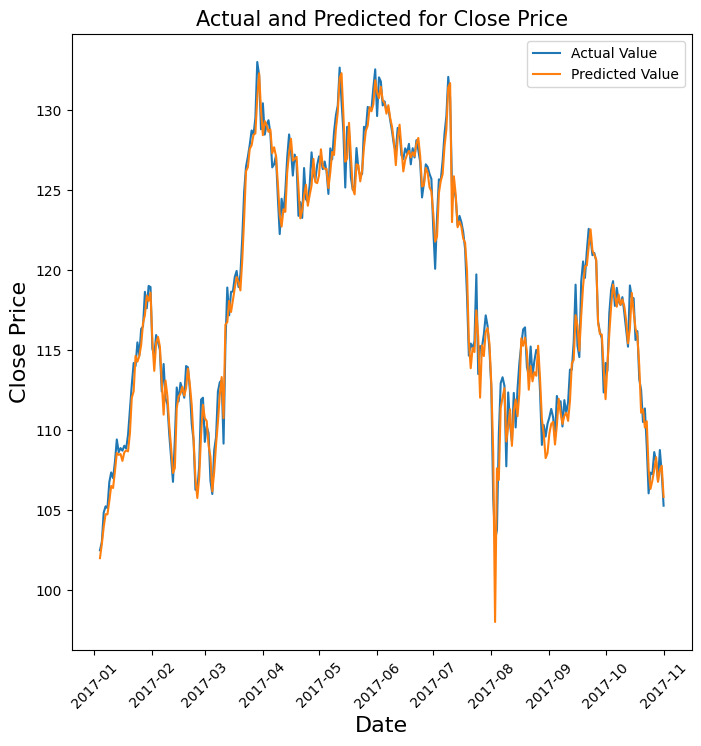

In [24]:
#Visualizing the result in a graph
date_values = pd.date_range(start='01-04-2017', periods=len(pred_df), freq='D')
plt.figure(figsize=(8, 8))
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.plot(date_values, pred_df)
plt.title('Actual and Predicted for Close Price', size=15)
plt.legend(['Actual Value', 'Predicted Value'])
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

In [25]:
#2. Convolutional Neural Network(CNN) algorithm

X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [26]:
#Model Training
model_2 = reg()
model_2.fit(X_train, y_train, epochs=40, validation_split=0.2)

c:\Users\narea\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 3502.1475 - val_loss: 4100.1812
Epoch 2/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 432.9230 - val_loss: 79.6554
Epoch 3/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.3578 - val_loss: 1.4895
Epoch 4/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0129 - val_loss: 1.0965
Epoch 5/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4453 - val_loss: 0.3996
Epoch 6/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3786 - val_loss: 0.4002
Epoch 7/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3561 - val_loss: 0.3804
Epoch 8/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3513 - val_loss: 0.3684
Epoch 9/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3577 - val_loss: 0.3674
Epoch 10/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3568 - val_loss: 0.3754
Epoch 11/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3500 - val_loss: 0.3923
Epoch 12/40
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.36

In [27]:
#Prediction
y_pred_2 = model_2.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [28]:
#Actual and predicted dataframe of CNN
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

,Actual,Predicted
6040,102.470001,102.810265
6045,102.989998,103.648476
6050,104.830002,104.720818
6055,105.220001,105.556969
6060,105.110001,105.534492


In [29]:
#Measure the Accuracy Score of CNN
from sklearn.metrics import r2_score
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.9762049967139987


In [30]:
#Evaluation metrics of CNN
mae = metrics.mean_absolute_error(y_test, y_pred_2)
mse = metrics.mean_squared_error(y_test, y_pred_2)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test, y_pred_2)

In [31]:
#Printing the values of evaluation metrics
print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.9602869599787219
MSE: 1.4719004649775025
RMSE: 1.21321905069839
R-Squared: 0.9762049967139987


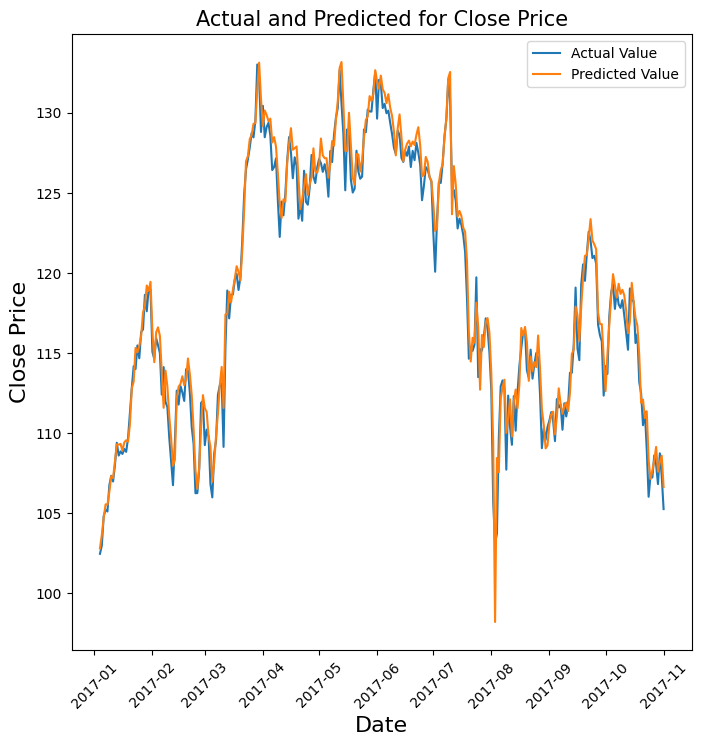

In [32]:
#Visualizing the result in a graph
date_values = pd.date_range(start='01-04-2017', periods=len(pred_df), freq='D')
plt.figure(figsize=(8, 8))
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.plot(date_values, pred_df)
plt.title('Actual and Predicted for Close Price', size=15)
plt.legend(['Actual Value', 'Predicted Value'])
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

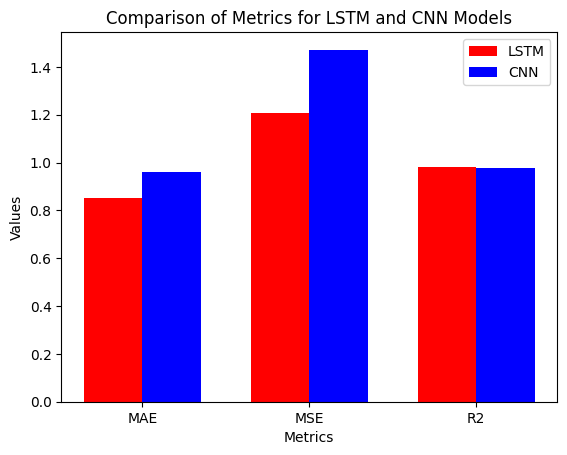

In [33]:
#Comparison of Metrics

#Comparison of MAE for LSTM and CNN
mae_lstm = metrics.mean_absolute_error(y_test, y_pred_1)
mae_cnn = metrics.mean_absolute_error(y_test, y_pred_2)

#Comparison of MSE for LSTM and CNN
mse_lstm = metrics.mean_squared_error(y_test, y_pred_1)
mse_cnn = metrics.mean_squared_error(y_test, y_pred_2)

#Comparison of R-squared values for LSTM and CNN
r2_lstm = metrics.r2_score(y_test, y_pred_1)
r2_cnn = metrics.r2_score(y_test, y_pred_2)

#Creating the grouped bar chart
labels = ['MAE', 'MSE', 'R2']
lstm_values = [mae_lstm, mse_lstm, r2_lstm]
cnn_values = [mae_cnn, mse_cnn, r2_cnn]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lstm_values, width, label='LSTM', color='red')
rects2 = ax.bar(x + width/2, cnn_values, width, label='CNN', color='blue')

#Adding labels, title, and customizing the axes
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Metrics for LSTM and CNN Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#Display the bar chart
plt.show()

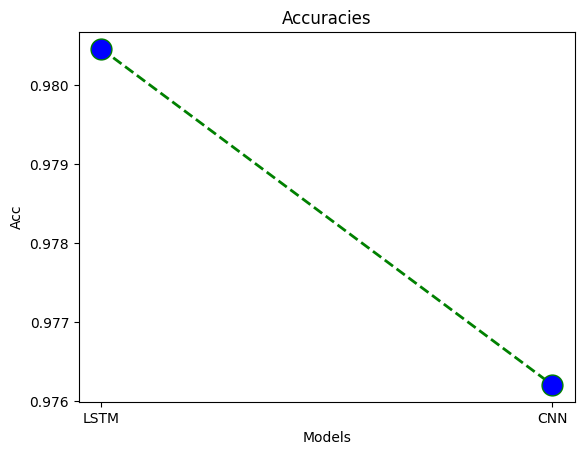

In [34]:
#Comparison of Accuracies
#Comparision of Accuracies of different models
plt.plot(range(2), Acc, color='green', linestyle='dashed', linewidth = 2,
         marker='o', markerfacecolor='blue', markersize=15)
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(2), ['LSTM','CNN'])
plt.show()

In [35]:
#Accuracy table for LSTM and CNN
result = pd.DataFrame(columns=['Algorithm','Result'])
m = ['LSTM',Acc[0]]
result.loc[0]=m
m = ['CNN',Acc[1]]
result.loc[1]=m
result

,Algorithm,Result
0,LSTM,0.980459
1,CNN,0.976205
